In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [8]:
df = pd.read_csv('CleanedSeattleData.csv')


X = df[['INTERSECTION', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND']]  # your features
y = df['INJURY_BINARY'] = df['SEVERITYCODE'].apply(lambda x: 1 if x > 1 else 0)

# Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train_val, X_test, y_train_val, y_test = train_test_split(X_scaled, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25)

# Create an SVM classifier
clf = svm.SVC(kernel='rbf', C=0.1)  
clf.fit(X_train, y_train)


SVC(C=0.01)

In [9]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.6520404851131636
              precision    recall  f1-score   support

           0       0.65      1.00      0.79     22097
           1       0.00      0.00      0.00     11792

    accuracy                           0.65     33889
   macro avg       0.33      0.50      0.39     33889
weighted avg       0.43      0.65      0.51     33889



/Users/altju/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/altju/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/altju/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


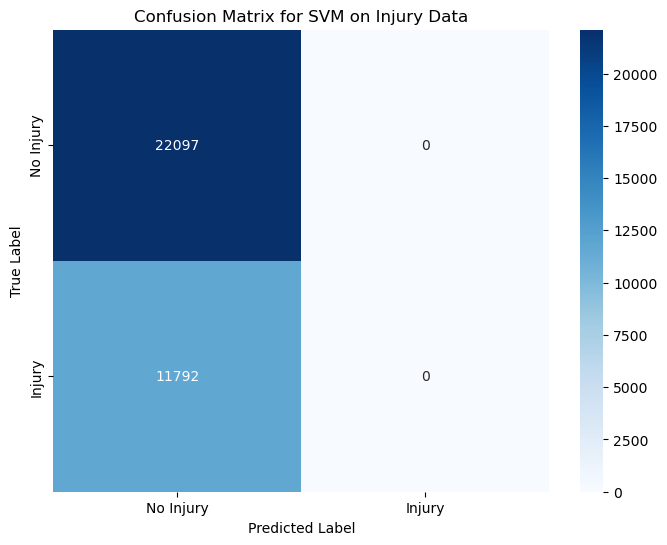

In [10]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Injury', 'Injury'], yticklabels=['No Injury', 'Injury'])
plt.title('Confusion Matrix for SVM on Injury Data')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()